In [1]:
import sys

In [2]:
sys.path.insert(0,"/global/cfs/cdirs/lsst/groups/PZ/users/sschmidt/Packages/EVAL_RAIL/RAIL")
sys.path.insert(0,"/global/cfs/cdirs/lsst/groups/PZ/users/sschmidt/Packages/qp")
sys.path.insert(0,"/global/cfs/cdirs/lsst/groups/PZ/users/sschmidt/Packages/lib/python3.8/site-packages")

In [3]:
import qp

In [5]:
import rail

Found classifier FZBoost
Found classifier trainZ
Found classifier randomPZ
Found classifier simpleNN


To demonstrate, I generated qp-formatted output for the 20k validation galaxies using FlexZBoost, which I copied to:<br>
/global/cfs/cdirs/lsst/groups/PZ/users/sschmidt/Packages/EVAL_RAIL/TMPDATA/<br>
files `test_FZBoost_qp.hdf5` and `test_FZBoost_qp_meta.hdf5`<br>
Let's load that data:

In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [8]:
fzdata = qp.read("/global/cfs/cdirs/lsst/groups/PZ/users/sschmidt/Packages/EVAL_RAIL/TMPDATA/test_FZBoost_qp.hdf5")

In [9]:
print(fzdata)

In [10]:
from rail.evaluation.metrics.pit import *

we also need the truth data, load the true redshifts as well:

In [11]:
truthfile = "/global/cfs/cdirs/lsst/groups/PZ/users/sschmidt/Packages/EVAL_RAIL/RAIL/tests/data/test_dc2_validation_9816.hdf5"
import h5py
with h5py.File(truthfile,"r") as f:
    ztrue = np.array(f['photometry/redshift'])

In [12]:
print(len(ztrue))

20449


We'll create a PIT class instance, which we'll use to compute the (temporary until we get a true samples distribution) spline ensemble object.  This also computes the PIT values for all 20k galaxies 

In [13]:
pitobj = PIT(fzdata, ztrue)

In [14]:
spl_ens, metamets = pitobj.evaluate()

/global/cfs/cdirs/lsst/groups/PZ/users/sschmidt/Packages/EVAL_RAIL/RAIL/rail/evaluation/metrics/pit.py:161: UserWarning: p-value floored: true value smaller than 0.001
  ad_results = stats.anderson_ksamp([pits_clean, uniform_yvals])


In [15]:
pit_vals = np.array(pitobj._pit_samps)

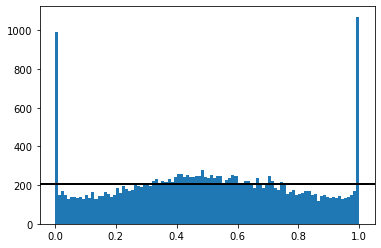

In [19]:
plt.hist(pit_vals,bins=np.linspace(0,1,101));
plt.axhline(204.49,color='k',lw=2)

In [20]:
ksobj = PITKS(spl_ens)

In [21]:
ksobj.evaluate()

stat_and_pval(statistic=0.042509362580575916, p_value=1.5129305435652397e-32)

In [22]:
adobj = PITAD(spl_ens)

In [23]:
adobj.evaluate()

stat_crit_sig(statistic=103.1364249925523, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

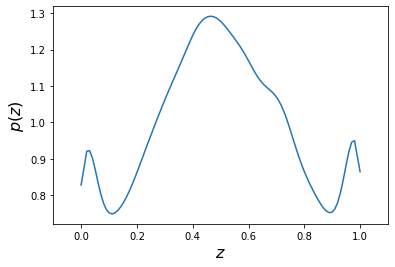

In [26]:
fig, axes = qp.plotting.plot_native(spl_ens, xlim=(-.1, 1.1), label="norm")
#plt.hist(pit_vals,bins=np.linspace(0,1,101));

In [30]:
vals,bins = np.histogram(pit_vals,bins=np.linspace(0,1,101))
cents = 0.5*(bins[1:]+bins[:-1])

<Figure size 1008x576 with 0 Axes>

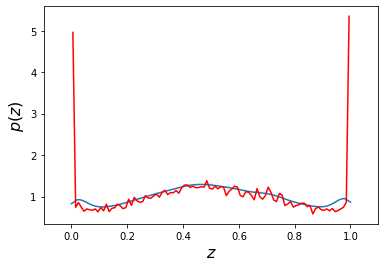

In [35]:
plt.figure(figsize=(14,8))
fig, axes = qp.plotting.plot_native(spl_ens, xlim=(-.1, 1.1), label="norm")
plt.plot(cents,vals*.005,c='r')

We can see that the spline is smoothing over the values at the extrema